In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos
base = pd.read_excel("C:/Users/wilme/Documents/Maestria/Proyecto Capstone/base_eventos.xlsx")
base.head()

,FECHA DEL EVENTO,AÑO,MES,PROVINCIA,CODIFICACION PROVINCIAL,EVENTO,CAUSA,CATEGORIA DEL EVENTO,CALIFICACION EVENTO PELIGROSO,NUM EVENTOS
0,2010-01-07,2010,1,Tungurahua,18,ACTIVIDAD VOLCÁNICA,PROCESO ERUPTIVO,NATURAL,Nivel 1,1
1,2010-01-08,2010,1,Galápagos,20,TORMENTA ELÉCTRICA,CONDICIONES ATMOSFÉRICAS,ÉPOCA LLUVIOSA,Nivel 1,2
2,2010-01-20,2010,1,Esmeraldas,8,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 2,1
3,2010-02-06,2010,2,Manabí,13,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 1,1
4,2010-02-06,2010,2,Santo Domingo De Los Tsáchilas,23,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 1,1


In [3]:
year_to_remove = 2023  # Año que quieres eliminar
data = base[base['AÑO'] != year_to_remove]

provincia_seleccionada = 'El Oro'
data1 = data[data['PROVINCIA'] == provincia_seleccionada]

# Convertir la columna 'FECHA DEL EVENTO' a datetime
data1['FECHA DEL EVENTO'] = pd.to_datetime(data1['FECHA DEL EVENTO'])

# Crear una columna 'AÑO_MES' para agrupar por año y mes
data1['AÑO_MES'] = data1['FECHA DEL EVENTO'].dt.to_period('M')

# Agrupar los datos por 'AÑO_MES' y contar el número de eventos en cada mes
events_per_month = data1.groupby('AÑO_MES').size()

# Mostrar las primeras filas de la serie temporal resultante
events_per_month


C:\Users\wilme\AppData\Local\Temp\ipykernel_21244\161909666.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['FECHA DEL EVENTO'] = pd.to_datetime(data1['FECHA DEL EVENTO'])
C:\Users\wilme\AppData\Local\Temp\ipykernel_21244\161909666.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['AÑO_MES'] = data1['FECHA DEL EVENTO'].dt.to_period('M')


AÑO_MES
2010-02     3
2010-03     3
2010-04     9
2010-05     7
2010-09     2
           ..
2022-08    14
2022-09    14
2022-10    20
2022-11    18
2022-12    17
Freq: M, Length: 151, dtype: int64

In [4]:
from statsmodels.tsa.stattools import adfuller
# Realizar la prueba de Dickey-Fuller aumentada para verificar la estacionariedad
adf_test_events = adfuller(events_per_month)

# Interpretar los resultados de la prueba de Dickey-Fuller
print(f'ADF Statistic: {adf_test_events[0]}')
print(f'p-value: {adf_test_events[1]}')
for key, value in adf_test_events[4].items():
    print(f'Critical Values {key}: {value}')

# Si el p-value es menor que 0.05, podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria (es no estacionaria).


ADF Statistic: -1.5968054062012658
p-value: 0.4851980393050074
Critical Values 1%: -3.479007355368944
Critical Values 5%: -2.8828782366015093
Critical Values 10%: -2.5781488587564603


In [5]:
events_per_month_diff=events_per_month.diff(1).bfill()

In [28]:
adf_test_events_diff = adfuller(events_per_month_diff)

# Interpretar los resultados de la prueba de Dickey-Fuller
print(f'ADF Statistic: {adf_test_events_diff[0]}')
print(f'p-value: {adf_test_events_diff[1]}')
for key, value in adf_test_events_diff[4].items():
    print(f'Critical Values {key}: {value}')

ADF Statistic: -5.566468481197124
p-value: 1.5008201733065818e-06
Critical Values 1%: -3.47864788917503
Critical Values 5%: -2.882721765644168
Critical Values 10%: -2.578065326612056


<Figure size 1200x600 with 0 Axes>

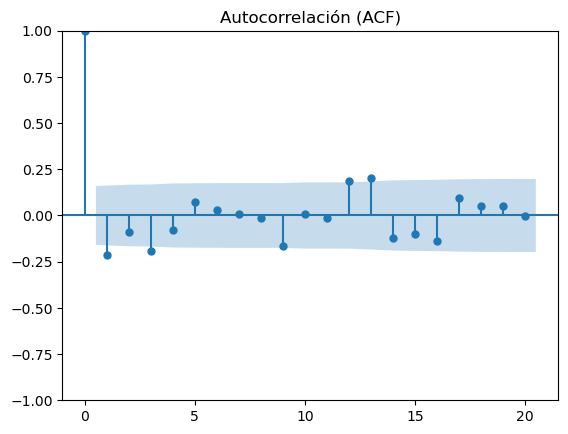

<Figure size 1200x600 with 0 Axes>

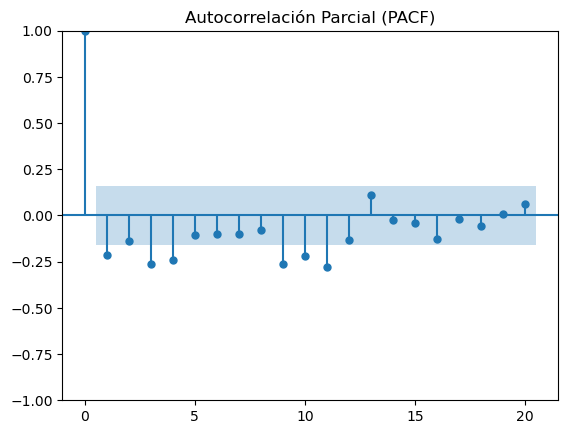

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Graficar la función de autocorrelación (ACF)
plt.figure(figsize=(12, 6))
plot_acf(events_per_month_diff, lags=20, alpha=0.05)
plt.title('Autocorrelación (ACF)')
plt.show()

# Graficar la función de autocorrelación parcial (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(events_per_month_diff, lags=20, alpha=0.05)
plt.title('Autocorrelación Parcial (PACF)')
plt.show()

In [44]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar un modelo ARIMA con los parámetros identificados
model_arima_events = ARIMA(events_per_month, order=(1, 1, 1))
results_arima_events = model_arima_events.fit()

# Mostrar el resumen del modelo ARIMA ajustado
results_arima_events.summary()

C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  151
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -523.935
Date:                Sat, 24 Feb 2024   AIC                           1053.871
Time:                        23:05:23   BIC                           1062.903
Sample:                    02-28-2010   HQIC                          1057.540
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4283      0.076      5.668      0.000       0.280       0.576
ma.L1         -0.9391      0.037    -25.191      0.000      -1.012      -0.866
sigma2        62.7522      4.963     12.644      0.000      53.025      72.480
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                37.73
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                             0.63
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

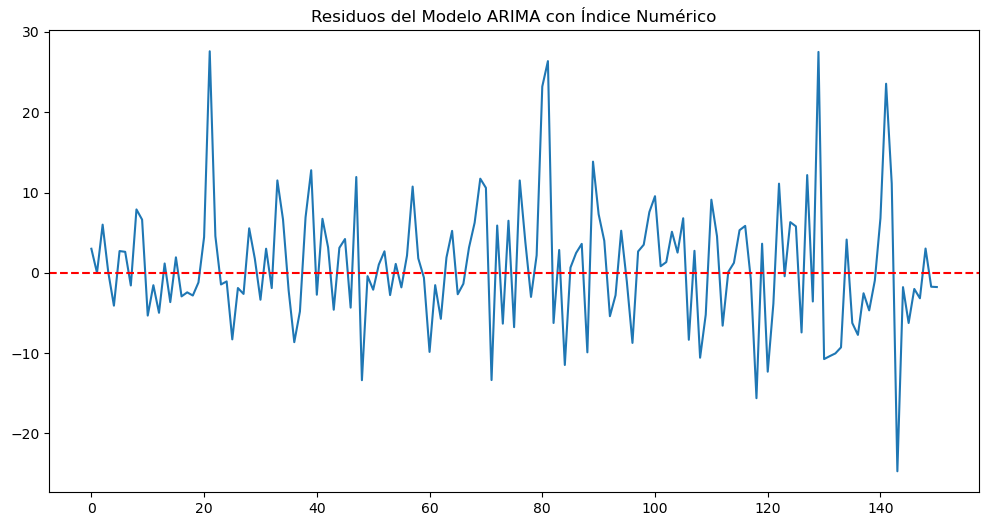

<Figure size 1200x600 with 0 Axes>

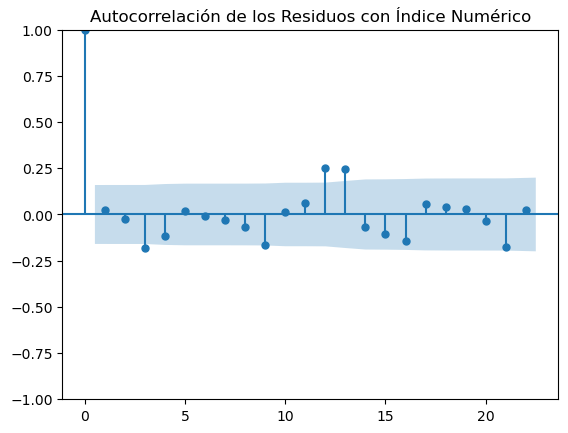

In [45]:
# Reindexar la serie de residuos con un rango numérico para facilitar la visualización
residuals = results_arima_events.resid
residuals_indexed = residuals.reset_index(drop=True)

# Gráfico de los residuos con índice numérico
plt.figure(figsize=(12, 6))
plt.plot(residuals_indexed)
plt.title('Residuos del Modelo ARIMA con Índice Numérico')
plt.axhline(0, linestyle='--', color='red')
plt.show()

# Función de autocorrelación de los residuos con índice numérico
plt.figure(figsize=(12, 6))
plot_acf(residuals_indexed, alpha=0.05)
plt.title('Autocorrelación de los Residuos con Índice Numérico')
plt.show()


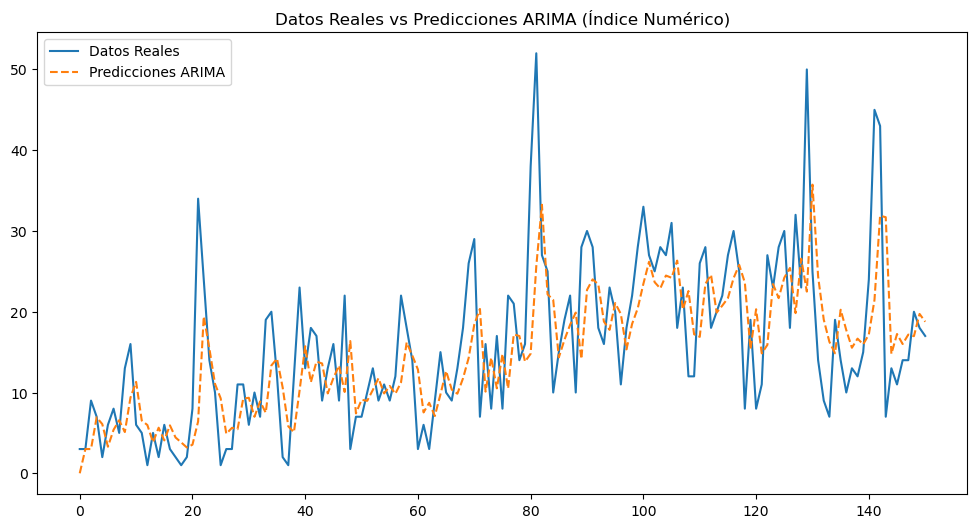

In [46]:
# Convertir el índice de 'events_per_month' y 'predictions' a un rango numérico para la visualización
events_per_month_indexed = events_per_month.reset_index(drop=True)
predictions = results_arima_events.predict(start=events_per_month.index[0], end=events_per_month.index[-1])
predictions_indexed = predictions.reset_index(drop=True)

# Gráfico de los datos reales vs las predicciones con índice numérico
plt.figure(figsize=(12, 6))
plt.plot(events_per_month_indexed, label='Datos Reales')
plt.plot(predictions_indexed, label='Predicciones ARIMA', linestyle='--')
plt.title('Datos Reales vs Predicciones ARIMA (Índice Numérico)')
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (23,) and (24,)

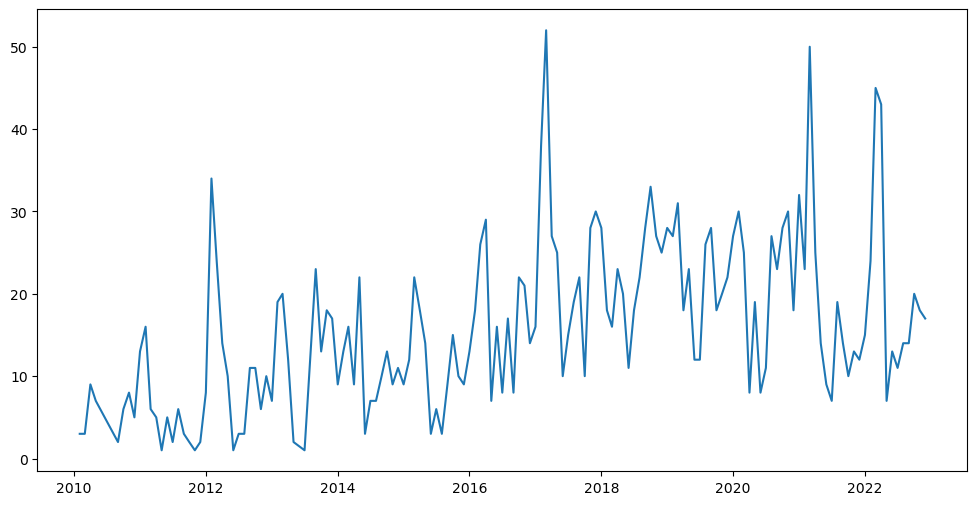

In [47]:
import pandas as pd

# Suponiendo que 'events_per_month' es tu serie temporal
# Convertir el índice de PeriodIndex a DateTimeIndex si aún no se ha hecho
events_per_month.index = events_per_month.index.to_timestamp()

# Ajustar el modelo ARIMA como antes
from statsmodels.tsa.arima.model import ARIMA

# Asumiendo que ya tienes el modelo ajustado, continuamos desde la generación de predicciones
n_periods = 24  # Número de periodos que quieres predecir hacia el futuro

# Generar fechas futuras para las predicciones
start = events_per_month.index[-1] + pd.DateOffset(months=1)
end = start + pd.DateOffset(months=n_periods - 1)

# Generar predicciones futuras
forecast = results_arima_events.get_forecast(steps=n_periods)

# Obtener el pronóstico y los intervalos de confianza
forecast_pred = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Para graficar, asegúrate de que las fechas de las predicciones sean compatibles
pred_dates = pd.date_range(start=start, end=end, freq='M')

# Visualizar las predicciones y los intervalos de confianza
plt.figure(figsize=(12, 6))
plt.plot(events_per_month.index, events_per_month, label='Datos Históricos')
plt.plot(pred_dates, forecast_pred, label='Predicciones Futuras', color='red')
plt.fill_between(pred_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Predicciones Futuras de Eventos Peligrosos')
plt.legend()
plt.show()


In [48]:
# Acceder a los valores predichos y convertirlos a un array de NumPy
forecast_values = forecast_pred.to_numpy()

# Acceder a los intervalos de confianza y convertirlos también a arrays de NumPy
lower_bounds = forecast_conf_int.iloc[:, 0].to_numpy()
upper_bounds = forecast_conf_int.iloc[:, 1].to_numpy()

# Mostrar los valores predichos y los intervalos de confianza
print("Valores Predichos:", forecast_values)
print("Intervalos de Confianza - Límite Inferior:", lower_bounds)
print("Intervalos de Confianza - Límite Superior:", upper_bounds)


Valores Predichos: [18.23152378 18.75904177 18.98500186 19.08179091 19.12325009 19.14100895
 19.14861589 19.15187429 19.15327001 19.15386786 19.15412394 19.15423364
 19.15428062 19.15430075 19.15430937 19.15431307 19.15431465 19.15431532
 19.15431562 19.15431574 19.15431579 19.15431582 19.15431583 19.15431583]
Intervalos de Confianza - Límite Inferior: [ 2.70541323  1.47441208  1.19762581  1.08399661  1.00093227  0.92411837
  0.84886481  0.77420675  0.69992506  0.62596224  0.55229976  0.47892967
  0.40584719  0.33304859  0.26053047  0.18828961  0.11632286  0.04462711
 -0.02680065 -0.09796342 -0.16886411 -0.23950561 -0.30989073 -0.38002224]
Intervalos de Confianza - Límite Superior: [33.75763432 36.04367145 36.77237792 37.07958521 37.2455679  37.35789954
 37.44836696 37.52954182 37.60661495 37.68177347 37.75594813 37.82953761
 37.90271406 37.97555292 38.04808827 38.12033652 38.19230644 38.26400354
 38.33543188 38.4065949  38.4774957  38.54813724 38.61852238 38.6886539 ]


In [49]:
import pandas as pd

# Asumiendo que 'pred_dates' es un array de fechas de tus predicciones futuras
# y que ya tienes 'forecast_values', 'lower_bounds', y 'upper_bounds'
pred_dates = pd.date_range(start=events_per_month.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='M')

# Crear un DataFrame para contener los periodos, las predicciones y los intervalos de confianza
forecast_df = pd.DataFrame({
    'Fecha': pred_dates,
    'Predicción': forecast_values,
    'Límite Inferior': lower_bounds,
    'Límite Superior': upper_bounds
})

# Establecer la fecha como el índice del DataFrame si lo prefieres
forecast_df.set_index('Fecha', inplace=True)

# Mostrar el DataFrame resultante
print(forecast_df)


            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-01-31   18.231524         2.705413        33.757634
2023-02-28   18.759042         1.474412        36.043671
2023-03-31   18.985002         1.197626        36.772378
2023-04-30   19.081791         1.083997        37.079585
2023-05-31   19.123250         1.000932        37.245568
2023-06-30   19.141009         0.924118        37.357900
2023-07-31   19.148616         0.848865        37.448367
2023-08-31   19.151874         0.774207        37.529542
2023-09-30   19.153270         0.699925        37.606615
2023-10-31   19.153868         0.625962        37.681773
2023-11-30   19.154124         0.552300        37.755948
2023-12-31   19.154234         0.478930        37.829538
2024-01-31   19.154281         0.405847        37.902714
2024-02-29   19.154301         0.333049        37.975553
2024-03-31   19.154309         0.260530        38.048088
2024-04-30   19.154313         

In [50]:
# Asegurarse de que el índice sea de tipo DateTimeIndex
# Si 'Fecha' no es el índice, primero convertirlo a índice y asegurarse de que es de tipo DateTime
if not isinstance(forecast_df.index, pd.DatetimeIndex):
    forecast_df.set_index('Fecha', inplace=True)

# Convertir el índice a DateTimeIndex si aún no lo es
forecast_df.index = pd.to_datetime(forecast_df.index)

# Agrupar por año y sumar las predicciones y límites para cada año
summed_forecast_by_year = forecast_df.resample('Y').sum()
summed_forecast_by_year_int = summed_forecast_by_year.astype(int) 
summed_forecast_by_year_rounded = summed_forecast_by_year.round()

# Mostrar el resultado
print(summed_forecast_by_year)
print(summed_forecast_by_year_int)
print(summed_forecast_by_year_rounded)


            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-12-31  228.237603        12.366687       444.108519
2024-12-31  229.851728         0.125619       459.577838
            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-12-31         228               12              444
2024-12-31         229                0              459
            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-12-31       228.0             12.0            444.0
2024-12-31       230.0              0.0            460.0
